In [ ]:
#!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


## 3-D Doc2Vec

Vector for ['deep', 'learning']: [ 0.00398833 -0.00897529 -0.00791726  0.00678475 -0.00225536 -0.00239559
 -0.00484434  0.00991127  0.00964773  0.00079846  0.00792299 -0.00114546
  0.00621299 -0.00265839 -0.00670696 -0.00861621  0.00407659  0.00377323
  0.003403    0.00586172  0.00832014 -0.00670863  0.0037695   0.00539208
 -0.00532158  0.00483966  0.00436139  0.0073327  -0.00534713  0.00308295
 -0.0021196  -0.00638502 -0.00551768 -0.00138829  0.0025388  -0.00612521
  0.00362748 -0.00506958  0.00296636  0.00598419  0.00878731  0.00890869
  0.00995397  0.00089241  0.00665324  0.00882707  0.00171188  0.00693745
 -0.00446384  0.00932289]


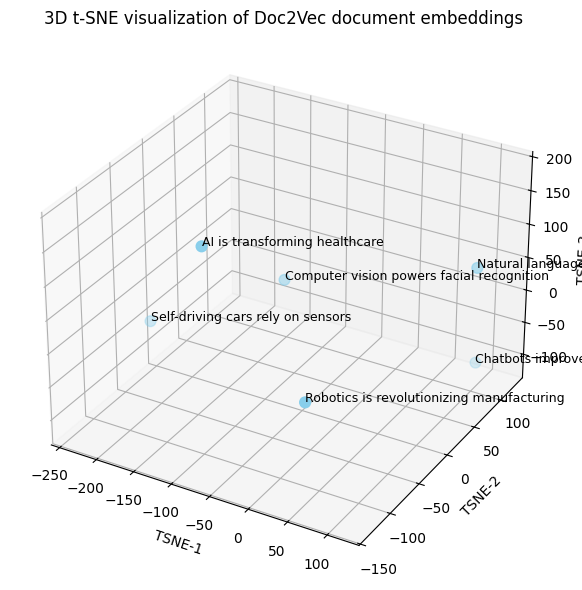

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example Corpus
data = [
    "AI is transforming healthcare",
    "Natural language processing is fascinating",
    "Self-driving cars rely on sensors",
    "Chatbots improve customer service",
    "Computer vision powers facial recognition",
    "Robotics is revolutionizing manufacturing"
]

# Tagging documents
tagged_data = [TaggedDocument(words=d.split(), tags=[str(i)]) for i, d in enumerate(data)]

# Training
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Inference
vec = model.infer_vector(["deep", "learning"])
print("Vector for ['deep', 'learning']:", vec)

# Get document vectors as a NumPy array
vectors = np.array([model.dv[str(i)] for i in range(len(tagged_data))])

# 3D t-SNE Visualization
tsne = TSNE(n_components=3, random_state=42, perplexity=2)
reduced = tsne.fit_transform(vectors)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c='skyblue', s=60)

for i, txt in enumerate(data):
    ax.text(reduced[i, 0], reduced[i, 1], reduced[i, 2], txt, fontsize=9)

ax.set_title("3D t-SNE visualization of Doc2Vec document embeddings")
ax.set_xlabel("TSNE-1")
ax.set_ylabel("TSNE-2")
ax.set_zlabel("TSNE-3")
plt.tight_layout()
plt.show()

## Sentiment Classification

In [ ]:
import gensim.downloader as api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import re

# Step 1: Load Pre-trained Word Embeddings
print("⏳ Loading GloVe embeddings...")
word_vectors = api.load("glove-wiki-gigaword-50")
print("✅ Loaded.")

# Step 2: Extended Data (text, sentiment)
data = [
    ("I loved the movie, it was fantastic!", "positive"),
    ("The movie was okay, not the best.", "neutral"),
    ("Terrible movie. Wouldn’t recommend.", "negative"),
    ("Really enjoyed the characters and plot.", "positive"),
    ("It was boring and predictable.", "negative"),
    ("An average film, not too bad.", "neutral"),
    ("What a masterpiece, absolutely loved it!", "positive"),
    ("Poor acting and bad script. Waste of time.", "negative"),
    ("Nothing special, just another average film.", "neutral"),
    ("Incredible visuals and emotional story.", "positive"),
    ("Couldn't even finish it. So bad.", "negative"),
    ("Neither good nor bad. Just meh.", "neutral"),
    ("Brilliant performance by the lead actor!", "positive"),
    ("The plot was weak and unoriginal.", "negative"),
    ("Mediocre at best, not memorable.", "neutral"),
    ("Exceeded my expectations. A must-watch!", "positive"),
    ("The direction was sloppy and confusing.", "negative"),
    ("Some parts were good, others not so much.", "neutral")
]

# Step 3: Preprocessing and Sentence Vectorization
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text.split()

def sentence_vector(sentence):
    words = preprocess(sentence)
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if not vectors:
        return np.zeros(word_vectors.vector_size)
    return np.mean(vectors, axis=0)

# Step 4: Create Training Data
X = [sentence_vector(text) for text, _ in data]
y = [label for _, label in data]

# Step 5: Train Classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

# Step 6: Predict New Review
new_review = "The plot was weak and unoriginal"
new_vec = sentence_vector(new_review)
predicted_label = clf.predict([new_vec])[0]
print(f"\n🔍 Predicted Sentiment for Review: \"{new_review}\" → {predicted_label}")

⏳ Loading GloVe embeddings...
✅ Loaded.

🔍 Predicted Sentiment for Review: "The plot was weak and unoriginal" → negative

📊 Classification Report on Training Data:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         6
     neutral       1.00      1.00      1.00         6
    positive       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



## Semantic Search

In [ ]:
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re

# ✅ Load pre-trained GloVe embeddings (50d for speed)
print("⏳ Loading pre-trained GloVe...")
word_vectors = api.load("glove-wiki-gigaword-50")
print("✅ Loaded GloVe embeddings.")

# Sample corpus of reviews
data = [
    "I loved the movie, it was fantastic!",
    "The movie was okay, not the best.",
    "Terrible movie. Wouldn’t recommend.",
    "Really enjoyed the characters and plot.",
    "It was boring and predictable.",
    "An average film, not too bad.",
    "What a masterpiece, absolutely loved it!",
    "Poor acting and bad script. Waste of time.",
    "Nothing special, just another average film.",
    "Incredible visuals and emotional story.",
    "Couldn't even finish it. So bad.",
    "Neither good nor bad. Just meh.",
    "Brilliant performance by the lead actor!",
    "The plot was weak and unoriginal.",
    "Mediocre at best, not memorable.",
    "Exceeded my expectations. A must-watch!",
    "The direction was sloppy and confusing.",
    "Some parts were good, others not so much."
]

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text.split()

# Function to get sentence embedding
def sentence_vector(sentence):
    words = preprocess(sentence)
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if not vectors:
        return np.zeros(word_vectors.vector_size)
    return np.mean(vectors, axis=0)

# Precompute document embeddings
doc_vectors = np.array([sentence_vector(doc) for doc in data])

# Semantic search
def semantic_search(query, top_n=3):
    query_vec = sentence_vector(query)
    similarities = cosine_similarity([query_vec], doc_vectors)[0]
    top_indices = similarities.argsort()[::-1][:top_n]

    print(f"\n🔍 Query: \"{query}\"")
    print(f"\nTop {top_n} most similar reviews:")
    for idx in top_indices:
        print(f"→ ({similarities[idx]:.2f}) {data[idx]}")

# Example
semantic_search("A deeply emotional film with stunning visuals")

⏳ Loading pre-trained GloVe...
✅ Loaded GloVe embeddings.

🔍 Query: "A deeply emotional film with stunning visuals"

Top 3 most similar reviews:
→ (0.94) Incredible visuals and emotional story.
→ (0.89) Really enjoyed the characters and plot.
→ (0.89) Brilliant performance by the lead actor!


## Document Rating

In [ ]:
import gensim.downloader as api
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import re

# Step 1: Load GloVe vectors (no external file needed)
print("⏳ Loading GloVe embeddings...")
word_vectors = api.load("glove-wiki-gigaword-50")
print("✅ Loaded GloVe embeddings.")

# Step 2: Sample data (text, sentiment, score)
data = [
    ("I loved the movie, it was fantastic!", "positive", 4.5),
    ("The movie was okay, not the best.", "neutral", 3.0),
    ("Terrible movie. Wouldn’t recommend.", "negative", 1.2),
    ("Really enjoyed the characters and plot.", "positive", 4.7),
    ("It was boring and predictable.", "negative", 2.0),
    ("An average film, not too bad.", "neutral", 3.2)
]

# Step 3: Preprocessing and vectorization
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text.split()

def sentence_vector(text):
    words = preprocess(text)
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if not vectors:
        return np.zeros(word_vectors.vector_size)
    return np.mean(vectors, axis=0)

# Step 4: Vectorize training data
X = [sentence_vector(text) for text, _, _ in data]
y = [score for _, _, score in data]

# Step 5: Train Ridge Regression
reg = Ridge()
reg.fit(X, y)

# Step 6: Predict and Evaluate on training
y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"\n📉 MSE on training data: {mse:.3f}")

# 🔮 Step 7: Predict Rating for a New Review
new_review = "This movie was absolutely thrilling and emotional"
new_vec = sentence_vector(new_review)
predicted_score = reg.predict([new_vec])[0]
print(f"\n⭐ Predicted Score for Review: \"{new_review}\" → {predicted_score:.2f}")


⏳ Loading GloVe embeddings...
✅ Loaded GloVe embeddings.

📉 MSE on training data: 0.186

⭐ Predicted Score for Review: "This movie was absolutely thrilling and emotional" → 3.53
